In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf


AAPL = yf.download("AAPL", start="2023-01-01", end="2023-09-01", interval='1d')
NVDA = yf.download("NVDA", start="2023-01-01", end="2023-09-01", interval='1d')
QQQ = yf.download("QQQ", start="2023-01-01", end="2023-09-01", interval='1d')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Define functions to calck KMean and plot lines

In [2]:
from sklearn.cluster import KMeans

def kmean(df, n = 4):
    prices = np.array(df['Adj Close'])
    
    kmeans = KMeans(n_clusters=n).fit(prices.reshape(-1, 1))
    clusters = kmeans.predict(prices.reshape(-1, 1))

    newDf = df.copy()
    newDf['Clusters'] = clusters

    clR = newDf.groupby('Clusters').max()
    clS = newDf.groupby('Clusters').min()

    newDf['Resistence'] = newDf["Clusters"].map(lambda x: clR.loc[x]['High'])
    newDf['Support'] = newDf["Clusters"].map(lambda x: clS.loc[x]['Adj Close'])

    return newDf

def plot(df, ax, show_resistence = True, show_support = True):
    resistence = df['Resistence'].unique().tolist()
    support = df['Support'].unique().tolist()

    lines = []
    colors = []

    if show_resistence:
        lines += resistence
        colors += ['r'] * len(resistence)
        print('add resistence')

    if show_support:
        lines += support
        colors += ['g'] * len(support)

    return mpf.plot(df, ax=ax, type='candle', hlines=dict(hlines=lines, colors=colors, linewidths=5, alpha=0.4), ylabel=ax.get_ylabel())

def plot_clusters(df):
    df.reset_index().plot.scatter(x='Date', y='Adj Close', c='Clusters', colormap='viridis', figsize=(20, 10))

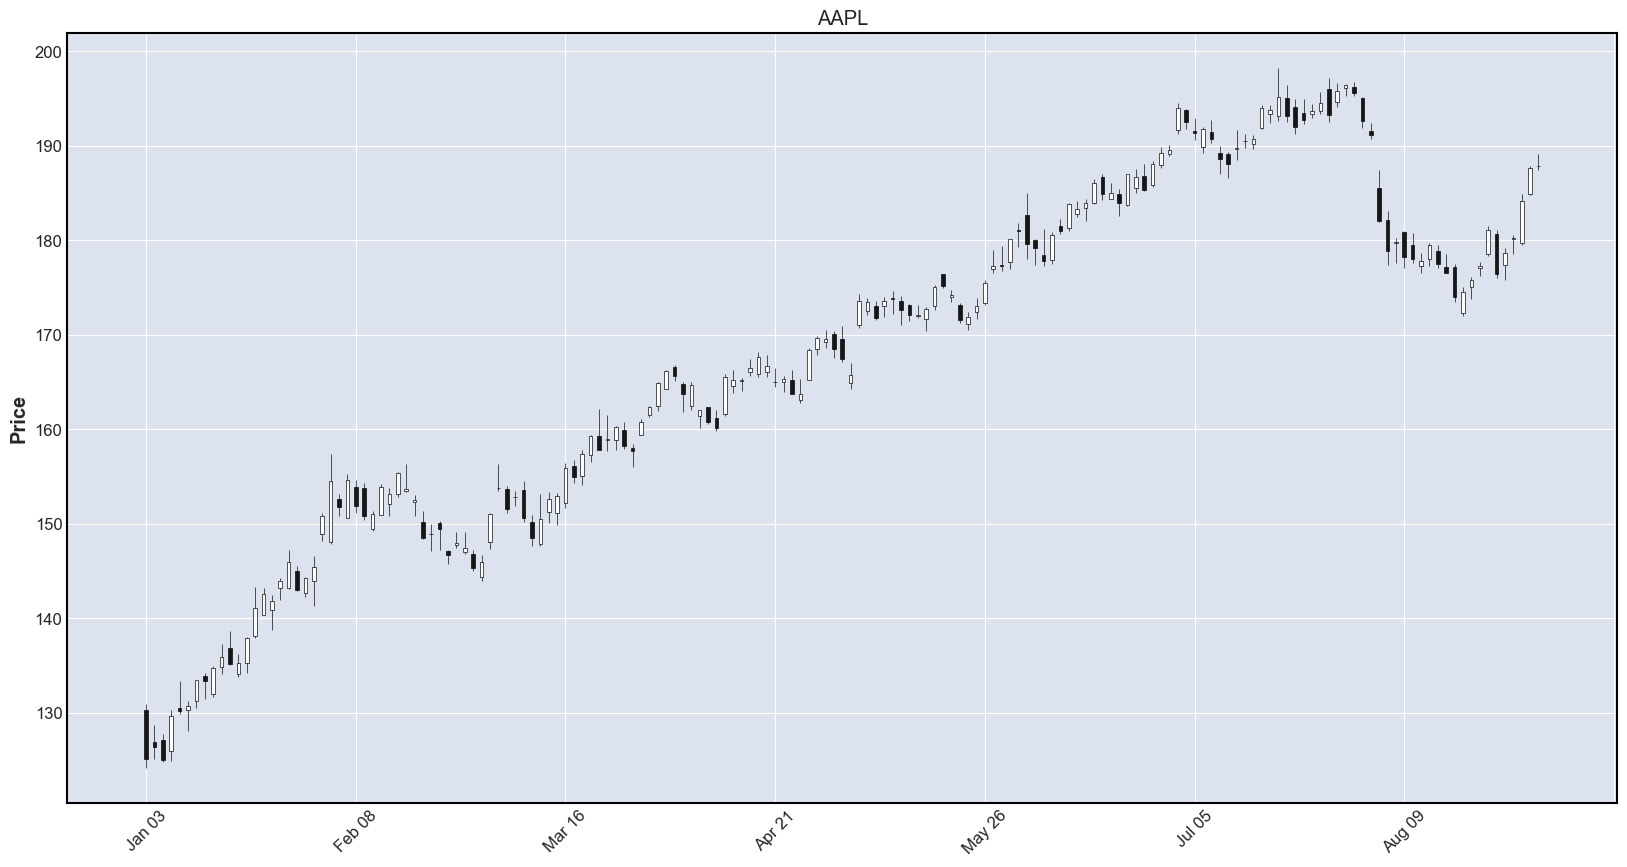

In [5]:
fig = mpf.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('AAPL')

mpf.plot(AAPL, ax=ax1, type='candle')


## Plot Support/Resistence

d:\Projects\python\gridtrading\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


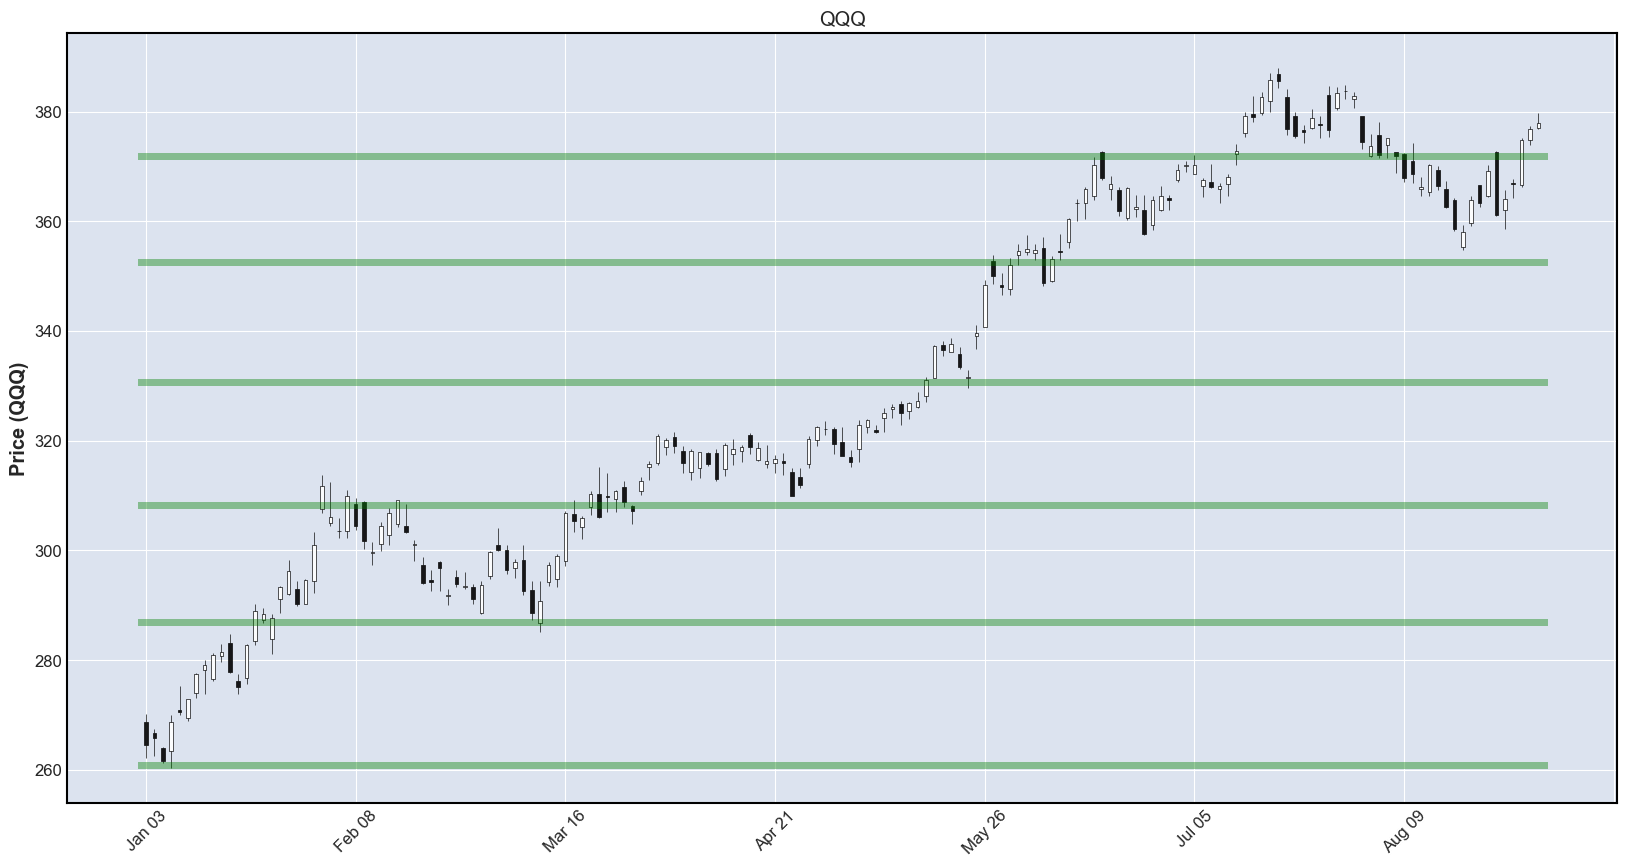

In [4]:
fig = mpf.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,1,1)

ax1.set_ylabel('Price (QQQ)')
ax1.set_title('QQQ')

df = kmean(QQQ, 6)
plot(df, ax=ax1, show_resistence=False)
